In [2]:
# Cargue de librerías
import pandas as pd
import numpy as np 
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Cargue de df
visits = pd.read_csv("/datasets//visits_log_us.csv")
orders = pd.read_csv("/datasets//orders_log_us.csv")
costs  = pd.read_csv("/datasets//costs_us.csv")

### Acceso y preparación de los datos

#### DF Visits

In [4]:
# Verificación DF
display("\n\n\n",visits)

'\n\n\n'

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [5]:
# Información DF
print(visits.describe(),"\n\n\n")
print(visits.info())

           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


#### DF Orders

In [6]:
# Verificación DF
display(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [7]:
# Información DF
print(orders.describe(),"\n\n\n")
print(orders.info())

            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


#### DF Costs

In [8]:
# Verificación DF
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [9]:
# Información DF
print("\n\n\n",costs.describe(),"\n\n\n")
print(costs.info())




          source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


#### Modificar los nombres de la columna a estilo "Snake case".

In [10]:
visits.columns = visits.columns.str.strip().str.lower().str.replace(' ', '_')
print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [11]:
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [12]:
costs.columns = costs.columns.str.strip().str.lower()
print(costs.columns)

Index(['source_id', 'dt', 'costs'], dtype='object')


#### Modificar tipo de datos.

In [13]:
orders["uid"] = orders["uid"].astype(str)
visits["uid"] = visits["uid"].astype(str)

orders["buy_ts"] = pd.to_datetime(orders["buy_ts"], errors="coerce")
visits["start_ts"] = pd.to_datetime(visits["start_ts"], errors="coerce")

#### Limpieza de datos.

In [14]:
visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs  = costs.drop_duplicates()

### Informes y cálculo de métricas 

#### 1. Visitas:
    1.1. ¿Cuántas personas lo usan cada día, semana y mes?
    1.2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
    1.3. ¿Cuál es la duración de cada sesión?
    1.4. ¿Con qué frecuencia los usuarios regresan?

#### Preparación de los datos.

In [15]:
# Fechas
visits["start_ts"] = pd.to_datetime(visits.get("start_ts"), errors="coerce")
visits["end_ts"]   = pd.to_datetime(visits.get("end_ts"),   errors="coerce")

In [16]:
# Granularidades para definir DAU, WAU & MAU
visits["year"] = visits["start_ts"].dt.year
visits["date"]  = visits["start_ts"].dt.normalize()
visits["week"]  = visits["start_ts"].dt.to_period("W").dt.start_time
visits["month"] = visits["start_ts"].dt.to_period("M").dt.to_timestamp()  # <- sin "MS"

#### 1.1. ¿Cuántas personas lo usan cada día, semana y mes?

In [17]:
# Generación de las métricas DAU, WAU y MAU
dau = (visits.groupby("date").agg({"uid":"nunique"}).mean()) # → Usuarios Activos Diarios
wau = (visits.groupby("week").agg({"uid":"nunique"}).mean())# → Usuarios Activos Semanales
mau = (visits.groupby("month").agg({"uid":"nunique"}).mean() )# → Usuarios Activos Mensuales

**¿Cuántas personas lo usan cada día?**

In [25]:
print("\nDAU - Promedio:",int(dau), "Personas\n")


DAU - Promedio: 907 Personas



**¿Cuántas personas lo usan cada semana?**

In [26]:
print("\nWAU - Promedio:",int(wau), "Personas\n")


WAU - Promedio: 5716 Personas



**¿Cuántas personas lo usan cada mes?**

In [27]:
print("\nWAU - Promedio:",int(mau), "Personas\n")


WAU - Promedio: 23228 Personas



#### 1.2. ¿Cuántas sesiones hay por día?

In [28]:
avg_session_per_day = (visits.groupby('date').agg({'uid':'count'}).mean())

print("\nDuración promedio de las sesiones:", int(avg_session_per_day), "sesiones\n")


Duración promedio de las sesiones: 987 sesiones



#### 1.3. ¿Cuál es la duración de cada sesión?

In [29]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print("\nDuración promedio de las sesiones:",(visits['duration'].mean()/60).round(2),"minutos\n")


Duración promedio de las sesiones: 10.73 minutos




Moda de la duración de la sesión: 60 Segundos



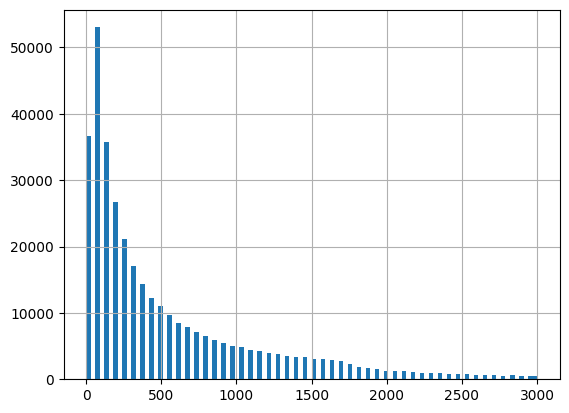

In [30]:
# Generación de gráfico para evaluar la distribución de la duración de las sesiones
visits["duration"].hist(bins=100, range=(0,3000))
print("\nModa de la duración de la sesión:",int(visits["duration"].mode()), "Segundos\n")

#### 1.4. ¿Con qué frecuencia los usuarios regresan?

In [31]:
# Factor de adherencia → (DAU/MAU)*100 

sticky_wau = dau/wau*100
sticky_mau = dau/mau*100

print("\nFrecuencia de regreso semanal:","%.2f" % sticky_wau, "%")
print("Frecuencia de regreso mensual:","%.2f" % sticky_mau, "%\n")


Frecuencia de regreso semanal: 15.88 %
Frecuencia de regreso mensual: 3.91 %



#### **Conclusiones**

* Usuario activo
    - Diario: 907 usuarios
    - Semanal: 5825 usuarios
    - Mensual: 23228 usuarios
* Sesión diaria: 987 sesiones
* Duración de la sesión:
    - Promedio: 10 minutos
    - Moda: 60 segundos
* Factor de adherencia:
    - Semanal: 15,59 %
    - Mensual: 3,91 %

## 2. Ventas:

    2.1 ¿Cuándo empieza la gente a comprar? 
    2.2. ¿Cuántos pedidos hacen durante un período de tiempo dado?
    2.3. ¿Cuál es el tamaño promedio de compra?
    2.4. ¿Cuánto dinero traen? (LTV)

#### 2.1. ¿Cuándo empieza la gente a comprar?

In [32]:
# Obtener la primera compra por usuario
first_order_ts = orders.groupby("uid")["buy_ts"].min()
# Obtener la primera compra por usuario
first_session_ts = visits.groupby("uid")["start_ts"].min()

# Nombrar las series resultantes
first_order_ts.name = "first_order_ts"
first_session_ts.name = "first_session_ts"

# Unir la primera compra al DataFrame de órdenes
orders = orders.join(first_order_ts, on="uid")
# Unir la primera sesión al DataFrame de órdenes
orders = orders.join(first_session_ts, on="uid")

# Calcular el tiempo transcurrido entre registro y primera compra (minutos)
orders["lead_time"] = ((orders["first_order_ts"] - orders["first_session_ts"]).dt.seconds)/(60)

orders.head()

,buy_ts,revenue,uid,first_order_ts,first_session_ts,lead_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0


Tiempo medio que transcurre antes de que el usuario decida realizar el pedido: 20 Minutos
Tiempo promedio que transcurre antes de que el usuario decida realizar el pedido 284 minutos
Tiempo máximo que transcurre antes de que el usuario decida realizar el pedido 24 horas


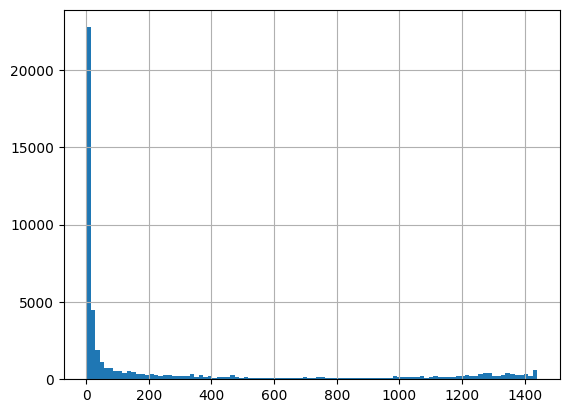

In [33]:
orders["lead_time"].hist(bins=100)
print("Tiempo medio que transcurre antes de que el usuario decida realizar el pedido:",int(orders["lead_time"].median()), "Minutos")
print("Tiempo promedio que transcurre antes de que el usuario decida realizar el pedido",int(orders["lead_time"].mean()), "minutos")
print("Tiempo máximo que transcurre antes de que el usuario decida realizar el pedido", int((orders["lead_time"].max()/60).round()), "horas" )

#### 2.2. ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [34]:
# Convertir la fecha de primera compra a mes calendario
orders["first_order_month"] = orders["first_order_ts"].astype("datetime64[M]")
# Convertir la fecha del pedido a mes calendario
orders["order_month"] = orders["buy_ts"].astype("datetime64[M]")

# Calcular la edad de cohorte en meses (mes del pedido - mes de primera compra)
orders["cohort"] = (orders["order_month"] - orders["first_order_month"]) / np.timedelta64(1, "M")
# Redondear la edad de cohorte y convertirla a entero
orders["cohort"] = orders["cohort"].round().astype("int")

# Formatear la primera compra (mes) como texto 'YYYY-MM' para impresión/agrupación
orders["first_order_month"] = orders["first_order_month"].dt.strftime("%Y-%m") 

orders.head()


,buy_ts,revenue,uid,first_order_ts,first_session_ts,lead_time,first_order_month,order_month,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06,2017-06-01,0


In [35]:
# Crear una tabla dinámica con cohortes 
order_pivot = orders.pivot_table(
    index="first_order_month",
    columns="cohort",
    values="uid",
    aggfunc="count",
)

order_pivot.fillna("") 

cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02,4095.0,222.0,83.0,70.0,,,,,,,,


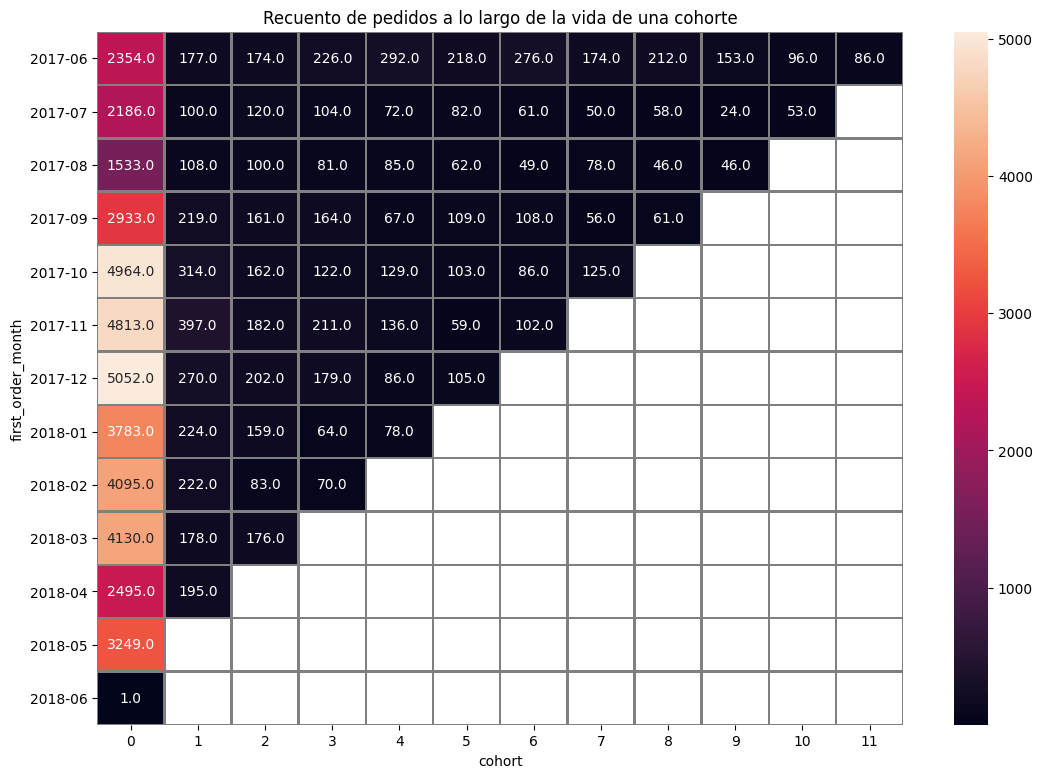

In [36]:
# Creación del mapa de calor
plt.figure(figsize=(13, 9))
plt.title("Recuento de pedidos a lo largo de la vida de una cohorte")
order_heatmap = sns.heatmap(
    order_pivot,
    annot=True,
    fmt=".1f",
    linewidths=1,
    linecolor="grey",
) 

#### 2.3. ¿Cuál es el tamaño promedio de compra?

In [37]:
# Agrupar los pedidos por mes de primera compra y edad de cohorte, calculando ingresos y usuarios únicos
orders_grouped_by_cohorts = orders.groupby(["first_order_month", "cohort"]).agg({"revenue": "sum", "uid": "nunique"})

# Calcular el ingreso promedio por usuario dentro de cada cohorte
orders_grouped_by_cohorts["revenue_per_user"] = (orders_grouped_by_cohorts["revenue"]/ orders_grouped_by_cohorts["uid"]) 

# Renombrar las columnas para mayor claridad
orders_grouped_by_cohorts.columns = ["sum_revenue", "n_users", "revenue_per_user"]

orders_grouped_by_cohorts

sum_revenue  n_users  revenue_per_user
first_order_month cohort                                        
2017-06           0           9557.49     2023          4.724414
                  1            981.82       61         16.095410
                  2            885.34       50         17.706800
                  3           1931.30       54         35.764815
                  4           2068.58       88         23.506591
...                               ...      ...               ...
2018-03           2           1114.87       58         19.221897
2018-04           0          10600.69     2276          4.657597
                  1           1209.92       69         17.535072
2018-05           0          13925.76     2988          4.660562
2018-06           0              3.42        1          3.420000

[79 rows x 3 columns]

In [38]:
# Crear una tabla dinámica con cohortes 
revenue_pivot = orders_grouped_by_cohorts.pivot_table(
    index="first_order_month",
    columns="cohort",
    values="revenue_per_user",
    aggfunc="mean",
) 

revenue_pivot.fillna("") 

cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419,,
2017-09,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,,,
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,,,,
2017-11,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,,,,,
2017-12,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,,,,,,
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,,,,,,,
2018-02,4.156987,8.61,4.942414,6.941026,,,,,,,,


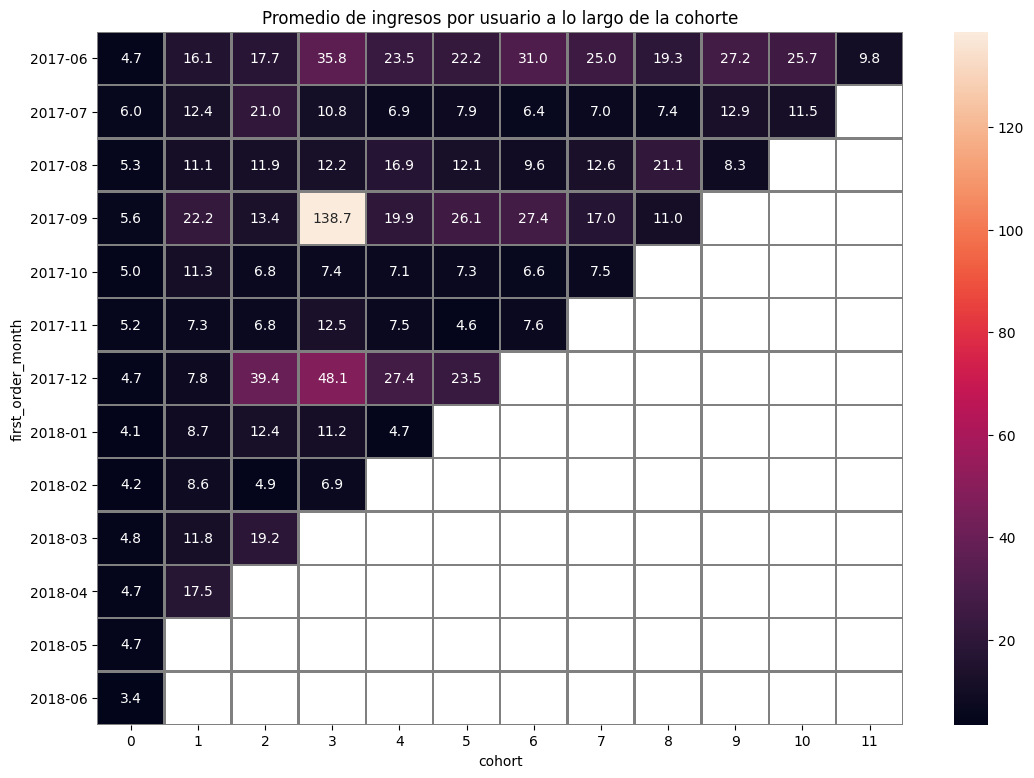

In [39]:
# Creación del mapa de calor
plt.figure(figsize=(13, 9))
plt.title('Promedio de ingresos por usuario a lo largo de la cohorte')
revenue_heatmap = sns.heatmap(
    revenue_pivot,
    annot=True,
    fmt=".1f",
    linewidths=1,
    linecolor="gray",
) 

#### 2.4. ¿Cuánto dinero traen? (LTV)

In [40]:
# Calcular el número de compradores únicos en cada cohorte (mes de primera compra)
cohort_sizes = orders.groupby("first_order_month").agg({"uid": "nunique"}).reset_index()
# Renombrar las columnas
cohort_sizes.columns = ["first_order_month", "n_buyers"]

cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [41]:
# Agrupar la tabla de "pedidos" por mes de primera compra y mes de compra. Suma de los ingresos. 
cohorts = orders.groupby(["first_order_month","cohort", "order_month"]).agg({"revenue": "sum"}).reset_index()

cohorts.head()

,first_order_month,cohort,order_month,revenue
0,2017-06,0,2017-06-01,9557.49
1,2017-06,1,2017-07-01,981.82
2,2017-06,2,2017-08-01,885.34
3,2017-06,3,2017-09-01,1931.30
4,2017-06,4,2017-10-01,2068.58


In [42]:
# Unir el tamaño de cada cohorte con sus métricas correspondientes en un solo DF
report = pd.merge(cohort_sizes, cohorts, on="first_order_month")

report.head()

,first_order_month,n_buyers,cohort,order_month,revenue
0,2017-06,2023,0,2017-06-01,9557.49
1,2017-06,2023,1,2017-07-01,981.82
2,2017-06,2023,2,2017-08-01,885.34
3,2017-06,2023,3,2017-09-01,1931.30
4,2017-06,2023,4,2017-10-01,2068.58


In [43]:
# Calcular las métricas LTV & CAC
report["ltv"] =  report["revenue"] / report["n_buyers"]

report.head() 

,first_order_month,n_buyers,cohort,order_month,revenue,ltv
0,2017-06,2023,0,2017-06-01,9557.49,4.724414
1,2017-06,2023,1,2017-07-01,981.82,0.485329
2,2017-06,2023,2,2017-08-01,885.34,0.437637
3,2017-06,2023,3,2017-09-01,1931.30,0.954671
4,2017-06,2023,4,2017-10-01,2068.58,1.022531


In [44]:
# Crear una tabla dinámica con cohortes 
ltv_pivot = report.pivot_table(
    index="first_order_month", columns="cohort", values="ltv", aggfunc="mean"
).round(2)

ltv_pivot.fillna('') 

cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02,4.16,0.28,0.08,0.07,,,,,,,,


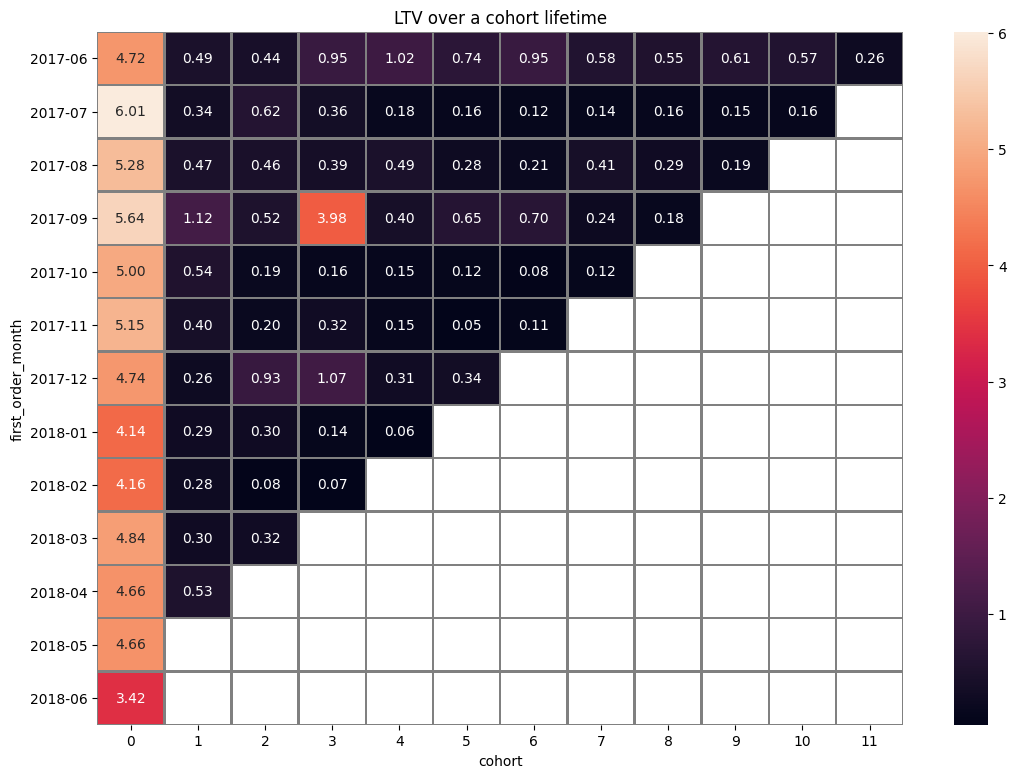

In [47]:
# Creación del mapa de calor
plt.figure(figsize=(13, 9))
plt.title("LTV over a cohort lifetime")
order_heatmap = sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor="gray",
) 

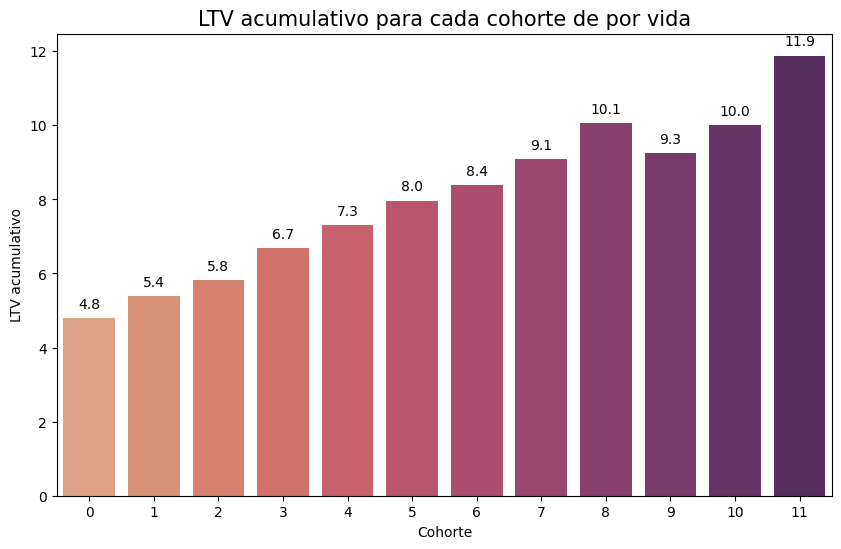

In [48]:
# Calcular el LTV acumulativo promedio por cohorte
cum_ltv = ltv_pivot.cumsum(axis=1).mean(axis=0).reset_index()
# Renombrar las columnas
cum_ltv.columns = ["cohort", "cumulative_LTV"]


# Creación de gráfico de barras con los valores de LTV acumulativo por cohorte

plt.figure(figsize=(10,6))
a = sns.barplot(data=cum_ltv, x="cohort", y="cumulative_LTV", palette="flare")

for g in a.patches:
    a.annotate(format(g.get_height(), ".1f"),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = "center", va = "center", 
                   xytext = (0, 10), rotation=0, 
                   textcoords = "offset points")
plt.title("LTV acumulativo para cada cohorte de por vida",fontsize=15)
plt.xlabel("Cohorte")
plt.ylabel("LTV acumulativo")
plt.show()


#### **Conclusiones**
* ***Recuento de pedidos:*** Los cohortes muestran una caída significativa después del primer mes en cada cohorte muestra que la mayoría de los usuarios no realizan compras repetidas.
* ***Ingresos promedio por usuario:*** Los cohortes muestran que el comprador que decide realizar una compra repetida realiza un pedido en mayor volumen que su primer pedido.
* ***Valor del ciclo de vida:*** Cada cohorte comienza con un valor de vida del cliente (LTV) casi similar, experimenta una caída en los ingresos promedio por comprador al mes siguiente y, de forma acumulativa, continúa aumentando su valor.

## 3. Marketing:

    3.1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
    3.2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
    3.3. ¿Cuán rentables eran las inversiones? (ROMI)

#### 3.1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)

In [49]:
# Gasto total del departamento de marketing
print("En general, el departamento de marketing ha gastado:","${:8,.2f}".format(costs["costs"].sum()))

En general, el departamento de marketing ha gastado: $329,131.62


In [50]:
# Calcular el gasto total por fuente de tráfico o canal
expense_per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
# Calcular el porcentaje que representa cada fuente sobre el gasto total
expense_per_source['percentage'] = expense_per_source['costs'] / (costs['costs'].sum()) *100

expense_per_source

,source_id,costs,percentage
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


In [51]:
# Convertir la fecha de "cost" a mes calendario
costs['month'] = costs['dt'].astype('datetime64[M]')

# Calcular el gasto total por mes
expense_per_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()
# Calcular el porcentaje que representa cada mes sobre el gasto total
expense_per_month['percentage'] = expense_per_month['costs'] / (costs['costs'].sum()) *100

# Formatear el mes como texto 'YYYY-MM'
expense_per_month['month'] = expense_per_month['month'].dt.strftime('%Y-%m') 

expense_per_month

,month,costs,percentage
0,2017-06,18015.00,5.473494
1,2017-07,18240.59,5.542035
2,2017-08,14790.54,4.493807
3,2017-09,24368.91,7.404001
4,2017-10,36322.88,11.035974
5,2017-11,37907.88,11.517544
6,2017-12,38315.35,11.641346
7,2018-01,33518.52,10.183926
8,2018-02,32723.03,9.942232
9,2018-03,30415.27,9.241066


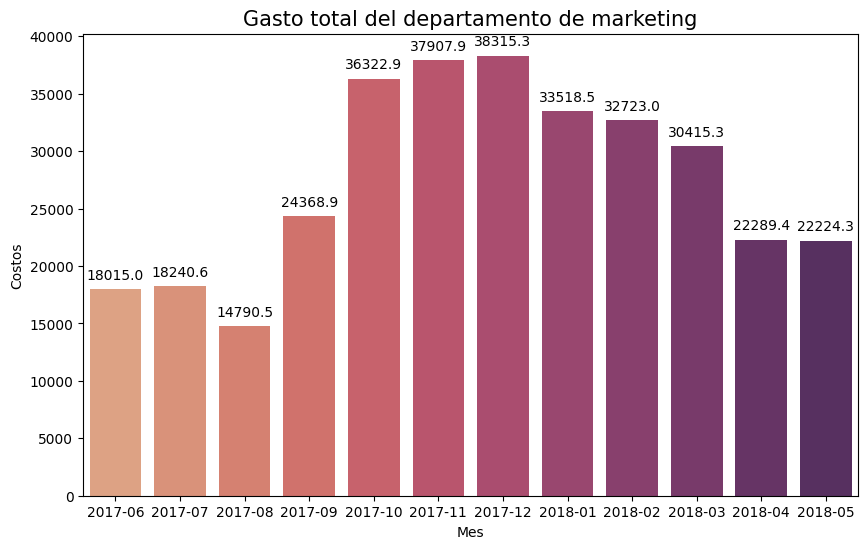

In [52]:
# Creación de gráfico de barras del gasto total por mes
plt.figure(figsize=(10,6))
a = sns.barplot(data=expense_per_month, x="month", y="costs", palette="flare")

for g in a.patches:
    a.annotate(format(g.get_height(), ".1f"),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = "center", va = "center", 
                   xytext = (0, 10), rotation=0, 
                   textcoords = "offset points")
plt.title("Gasto total del departamento de marketing",fontsize=15)
plt.xlabel("Mes")
plt.ylabel("Costos")
plt.show()

#### 3.2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [53]:
# Calcular la cantidad de visitantes únicos
source_sizes = visits.groupby("source_id").agg({"uid": "nunique"}).reset_index()
# Renombrar las columnas
source_sizes.columns = ["source_id", "n_visitors"]

source_sizes

,source_id,n_visitors
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [54]:
# Unir el número de visitantes con los costos correspondientes
cac_report = source_sizes.join(expense_per_source["costs"], how="left", on = "source_id")
cac_report["cac"] = cac_report["costs"] / cac_report["n_visitors"]

cac_report

,source_id,n_visitors,costs,cac
0,1,18999,42806.04,2.253068
1,2,26245,141321.63,5.384707
2,3,74756,61073.60,0.816973
3,4,83525,51757.10,0.619660
4,5,56974,5517.49,0.096842
5,6,6,5822.49,970.415000
6,7,34,NaN,NaN
7,9,9264,NaN,NaN
8,10,8067,NaN,NaN


#### 3.3. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [55]:
# Unir el número de visitantes por fuente con los costos correspondientes
report = pd.merge(report, expense_per_month[["month", "costs"]], left_on="first_order_month", right_on="month")
# Calcular el CAC
report["cac"] = report["costs"] / report["n_buyers"]

report.head()

,first_order_month,n_buyers,cohort,order_month,revenue,ltv,month,costs,cac
0,2017-06,2023,0,2017-06-01,9557.49,4.724414,2017-06,18015.0,8.905091
1,2017-06,2023,1,2017-07-01,981.82,0.485329,2017-06,18015.0,8.905091
2,2017-06,2023,2,2017-08-01,885.34,0.437637,2017-06,18015.0,8.905091
3,2017-06,2023,3,2017-09-01,1931.30,0.954671,2017-06,18015.0,8.905091
4,2017-06,2023,4,2017-10-01,2068.58,1.022531,2017-06,18015.0,8.905091


In [58]:
# Calcular el ROMI
report["romi"] = report["ltv"] / report["cac"]

# Crear una tabla dinámica del ROMI promedio por cohorte y mes de primera compra
romi_pivot = report.pivot_table(index="first_order_month", columns="cohort", values="romi", aggfunc="mean")

# Calcular el ROMI acumulativo a lo largo del tiempo para cada cohorte
cum_romi_pivot = romi_pivot.cumsum(axis=1).round(2)

# Reemplazar valores nulos por vacío
cum_romi_pivot.fillna("")


cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


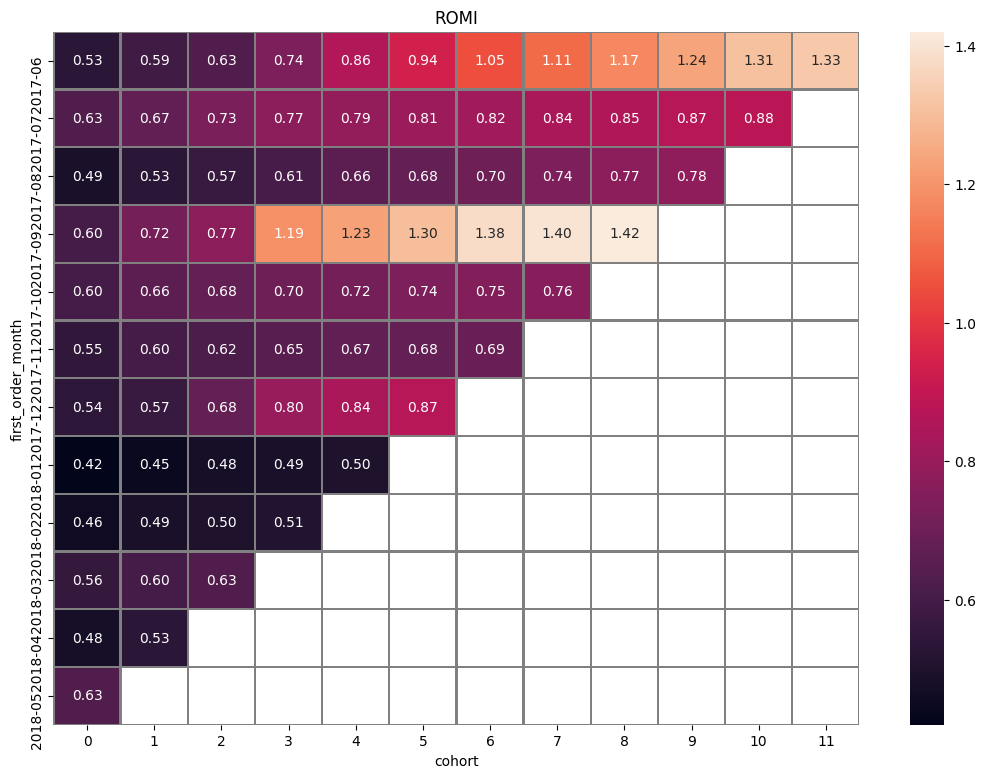

In [60]:
# Creación de mapa de calor
plt.figure(figsize=(13, 9))
plt.title("ROMI")
romi_heatmap = sns.heatmap(
    cum_romi_pivot,
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor="gray",
) 

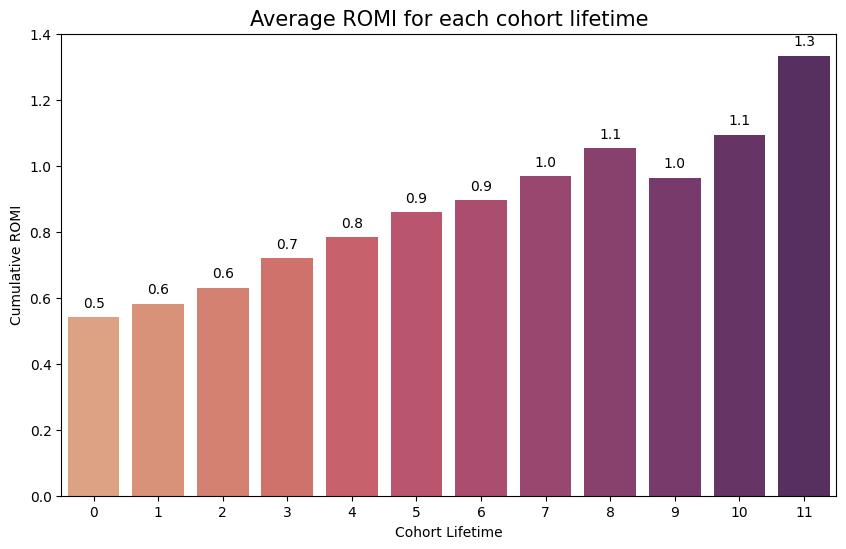

In [62]:
# Calcular el ROMI acumulativo promedio por edad de cohorte
cum_romi = romi_pivot.cumsum(axis=1).mean(axis=0).reset_index()

# Renombrar columnas
cum_romi.columns = ['cohort', 'cum_romi']

# Graficar barras de ROMI acumulativo por edad de cohorte
plt.figure(figsize=(10,6))
c = sns.barplot(data=cum_romi, x='cohort', y='cum_romi', palette='flare')

for g in c.patches:
    c.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
plt.title('Average ROMI for each cohort lifetime',fontsize=15)
plt.xlabel('Cohort Lifetime')
plt.ylabel('Cumulative ROMI')
plt.show()

#### *Conclusiones:*
Para el equipo del área de MKTG, se le sugiere lo siguiente:
* Aumentar la inversión en fuentes publicitarias con un bajo costo de adquisición de clientes, especialmente en las fuentes 2, 3 y 4.
* Explorar nuevas oportunidades en fuentes con un alto volumen de visitantes que aún no han sido utilizadas, como las fuentes 9 y 10.
* Reducir la inversión en fuentes publicitarias con un costo de adquisición elevado, en particular la fuente 6.